In [41]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn
import logging
import datetime

In [46]:
logging.root.handlers.clear()
logging.root.handlers

[]

In [47]:
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
log_filename = f"RutasLima_{timestamp}.log"

logging.basicConfig(
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S',
)

logFormatter = logging.Formatter('%(asctime)s :: %(levelname)s :: %(name)s :: %(process)d :: %(message)s')
logger = logging.getLogger()

fileHandler = logging.FileHandler(log_filename)
fileHandler.setFormatter(logFormatter)
logger.addHandler(fileHandler)

In [48]:
logging.root.handlers

[<StreamHandler stderr (NOTSET)>,
 <FileHandler /home/leibnitz.rojas/intercon-simbig-2021/Lima/RutasLima_20230801000216.log (NOTSET)>]

# Grafo Lima

In [2]:
%%time
# place_name = "Lima, Peru"
place_name = ["Province of Lima, Lima Metropolitan Area, Lima, Peru",
"Constitutional Province of Callao, Peru"]
graph = ox.graph_from_place(place_name, which_result=1, network_type='drive')

CPU times: user 5min 8s, sys: 5.2 s, total: 5min 14s
Wall time: 11min 33s


In [3]:
print(nx.info(graph))

Name: 
Type: MultiDiGraph
Number of nodes: 148111
Number of edges: 395620
Average in degree:   2.6711
Average out degree:   2.6711


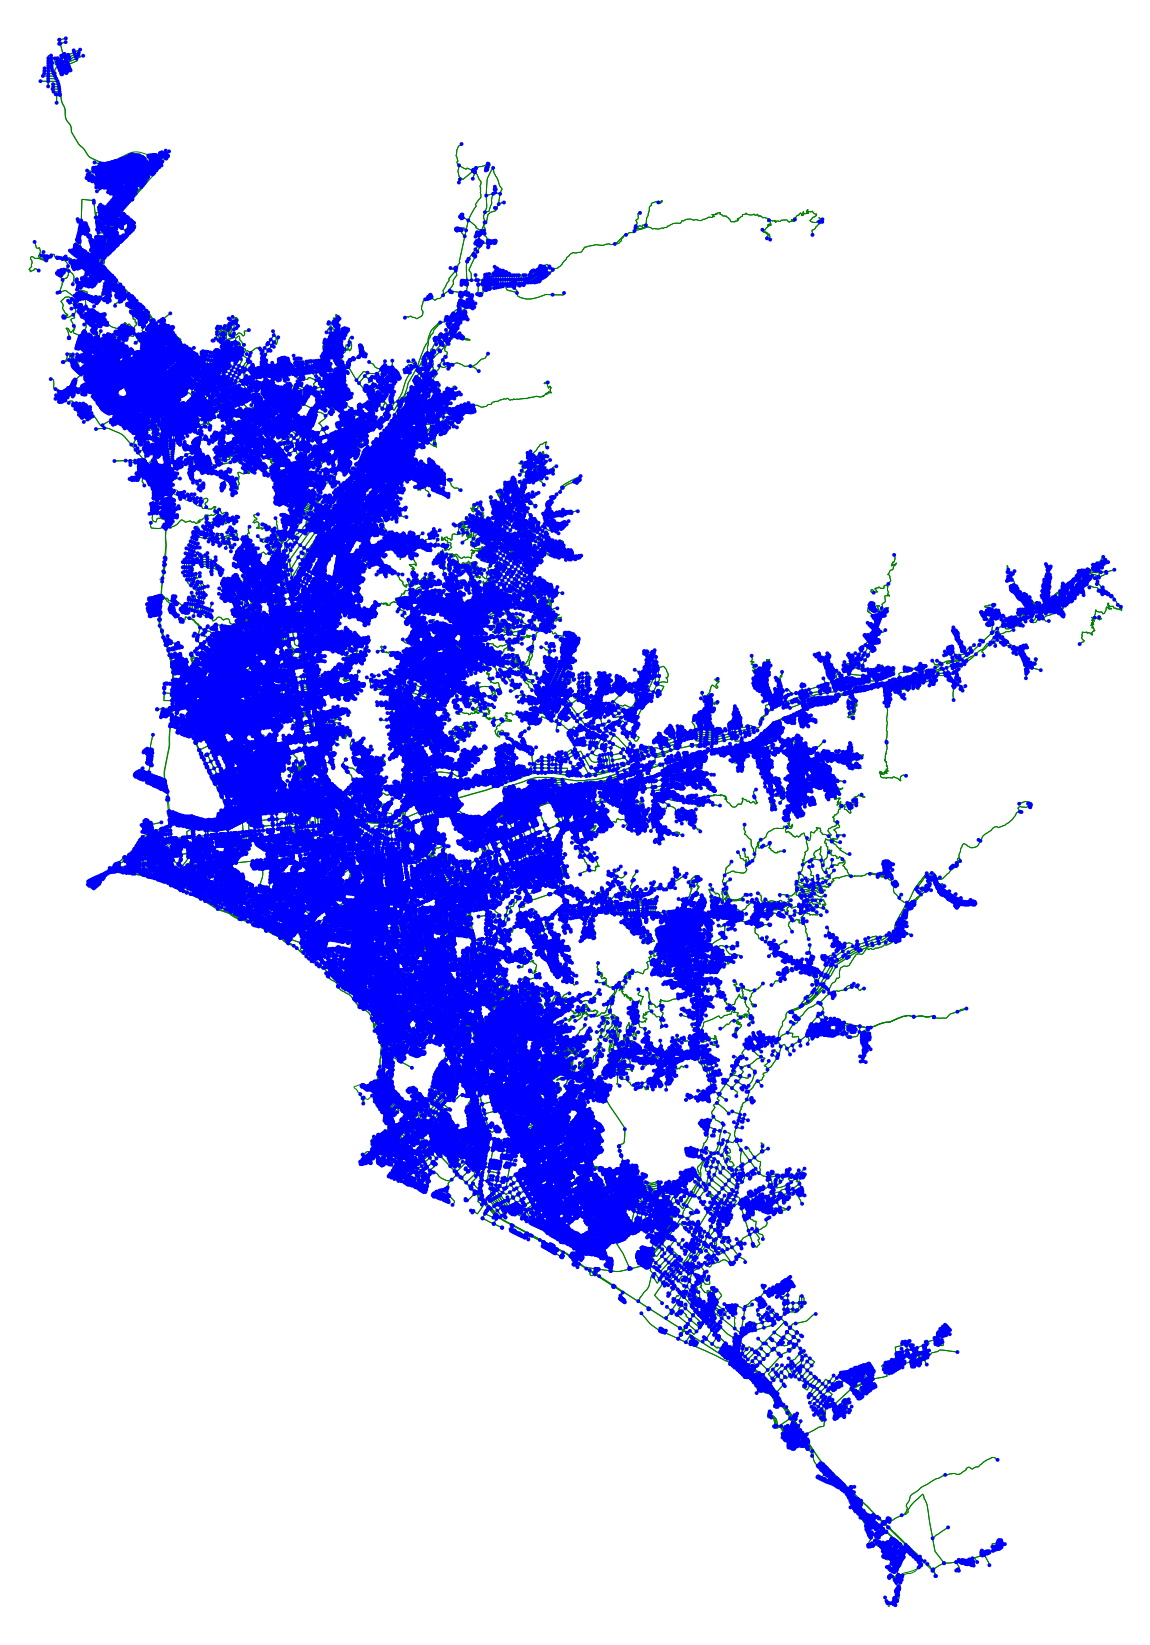

In [4]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', figsize=(30,30))

In [5]:
nodes, edges = ox.graph_to_gdfs(graph)

In [6]:
nodes.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
258066779,-12.371360,-76.784678,45A,motorway_junction,3,POINT (-76.78468 -12.37136)
258066780,-12.376318,-76.779559,NaN,NaN,3,POINT (-76.77956 -12.37632)
258066781,-12.384553,-76.771046,NaN,NaN,3,POINT (-76.77105 -12.38455)
258066783,-12.385783,-76.769768,NaN,NaN,3,POINT (-76.76977 -12.38578)
258067237,-12.304254,-76.840727,NaN,NaN,3,POINT (-76.84073 -12.30425)


In [7]:
edges.head()

osmid  oneway lanes  \
u         v           key                                                     
258066779 10985400003 0                              39457621    True     1   
          258066780   0    [1046533254, 338193454, 143630423]    True     2   
258066780 258066781   0                             143630430    True     2   
258066781 258066783   0                             143630430    True     2   
          495302399   0                              40752940    True     1   

                                 highway maxspeed    length  \
u         v           key                                     
258066779 10985400003 0    motorway_link       80   109.492   
          258066780   0         motorway      100   782.922   
258066780 258066781   0            trunk      100  1301.315   
258066781 258066783   0            trunk      100   194.871   
          495302399   0       trunk_link      NaN    85.154   

                                                                    geometry  \
u         v           key                                                      
258066779 10985400003 0    LINESTRING (-76.78468 -12.37136, -76.78466 -12...   
          258066780   0    LINESTRING (-76.78468 -12.37136, -76.78433 -12...   
258066780 258066781   0    LINESTRING (-76.77956 -12.37632, -76.77670 -12...   
258066781 258066783   0    LINESTRING (-76.77105 -12.38455, -76.76977 -12...   
          495302399   0    LINESTRING (-76.77105 -12.38455, -76.77099 -12...   

                             ref                        name bridge junction  \
u         v           key                                                      
258066779 10985400003 0      NaN                         NaN    NaN      NaN   
          258066780   0    PE-1S  Carretera Panamericana Sur    yes      NaN   
258066780 258066781   0    PE-1S  Carretera Panamericana Sur    NaN      NaN   
258066781 258066783   0    PE-1S  Carretera Panamericana Sur    NaN      NaN   
          495302399   0      NaN                         NaN    NaN      NaN   

                          access tunnel width service  
u         v           key                              
258066779 10985400003 0      NaN    NaN   NaN     NaN  
          258066780   0      NaN    NaN   NaN     NaN  
258066780 258066781   0      NaN    NaN   NaN     NaN  
258066781 258066783   0      NaN    NaN   NaN     NaN  
          495302399   0      NaN    NaN   NaN     NaN

# Wazeinfo

In [34]:
import WazeRouteCalculator

def getWazeRouteInfo(node_a, node_b):
    """
    node_a: node origin from graph
    node_b: node destination from graph
    """
    try:
        logger.info(f"Waze info for node_a {node_a} to node_b {node_b} started.")

        point_a_lat, point_a_lon = nodes.loc[node_a,:].geometry.y , nodes.loc[node_a,:].geometry.x
        point_b_lat, point_b_lon = nodes.loc[node_b,:].geometry.y , nodes.loc[node_b,:].geometry.x
        from_address = '%s, %s' % (point_a_lat, point_a_lon)

        to_address = '%s, %s' % (point_b_lat, point_b_lon)
        from_address , to_address

        route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address)
        minutes, distance = route.calc_route_info()
        logger.info(f"Waze info for node_a {node_a} to node_b {node_b} completed.")
    except Exception as e:
        logger.info(f"Error in Waze info for node_a {node_a} to node_b {node_b}.")
        logger.info(e)
        minutes, distance = -1, -1
    return minutes, distance

In [33]:
getWazeRouteInfo(258066779, 10985400003)

2023-07-29 23:31:58 :: INFO :: WazeRouteCalculator.WazeRouteCalculator :: 1807 :: From: -12.3713597, -76.7846777 - to: -12.372121, -76.7840528
2023-07-29 23:31:58 :: DEBUG :: WazeRouteCalculator.WazeRouteCalculator :: 1807 :: Start coords: (-12.3713597, -76.7846777)
2023-07-29 23:31:58 :: DEBUG :: WazeRouteCalculator.WazeRouteCalculator :: 1807 :: End coords: (-12.372121, -76.7840528)
2023-07-29 23:31:58 :: DEBUG :: urllib3.connectionpool :: 1807 :: Starting new HTTPS connection (1): www.waze.com:443
2023-07-29 23:31:59 :: DEBUG :: urllib3.connectionpool :: 1807 :: https://www.waze.com:443 "GET /row-RoutingManager/routingRequest?from=x%3A-76.7846777+y%3A-12.3713597&to=x%3A-76.7840528+y%3A-12.372121&at=0&returnJSON=true&returnGeometries=true&returnInstructions=true&timeout=60000&nPaths=1&options=AVOID_TRAILS%3At%2CAVOID_TOLL_ROADS%3Af%2CAVOID_FERRIES%3Af&subscription=%2A HTTP/1.1" 200 1934
2023-07-29 23:31:59 :: INFO :: WazeRouteCalculator.WazeRouteCalculator :: 1807 :: Time 0.05 minute

(0.05, 0.107)

In [51]:
edges2 = edges.reset_index()
edges2.head()

,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,bridge,junction,access,tunnel,width,service
0,258066779,10985400003,0,39457621,True,1,motorway_link,80,109.492,"LINESTRING (-76.78468 -12.37136, -76.78466 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,258066779,258066780,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,782.922,"LINESTRING (-76.78468 -12.37136, -76.78433 -12...",PE-1S,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN
2,258066780,258066781,0,143630430,True,2,trunk,100,1301.315,"LINESTRING (-76.77956 -12.37632, -76.77670 -12...",PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN
3,258066781,258066783,0,143630430,True,2,trunk,100,194.871,"LINESTRING (-76.77105 -12.38455, -76.76977 -12...",PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN
4,258066781,495302399,0,40752940,True,1,trunk_link,NaN,85.154,"LINESTRING (-76.77105 -12.38455, -76.77099 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
edges2.shape

(395620, 18)

In [57]:
395620/70000

5.651714285714286

In [101]:
80000/15000

5.333333333333333

In [98]:
logging.root.handlers

[]

In [78]:
edges2.shape

(395620, 18)

In [81]:
edges2.head()

,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,bridge,junction,access,tunnel,width,service
0,258066779,10985400003,0,39457621,True,1,motorway_link,80,109.492,"LINESTRING (-76.78468 -12.37136, -76.78466 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,258066779,258066780,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,782.922,"LINESTRING (-76.78468 -12.37136, -76.78433 -12...",PE-1S,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN
2,258066780,258066781,0,143630430,True,2,trunk,100,1301.315,"LINESTRING (-76.77956 -12.37632, -76.77670 -12...",PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN
3,258066781,258066783,0,143630430,True,2,trunk,100,194.871,"LINESTRING (-76.77105 -12.38455, -76.76977 -12...",PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN
4,258066781,495302399,0,40752940,True,1,trunk_link,NaN,85.154,"LINESTRING (-76.77105 -12.38455, -76.77099 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
results1 = pd.read_csv('RutasLimaWaze_parte01.txt', sep=';', index_col=0,names=['u','v','wazeinfo'])
results2 = pd.read_csv('RutasLimaWaze_parte02.txt', sep=';', index_col=0,names=['u','v','wazeinfo'])


In [112]:
results2.shape

(79786, 3)

In [113]:
results = pd.concat([results1, results2])
results.shape

(395620, 3)

In [121]:
results.sort_index().to_csv("RutasLimaWaze.txt", sep=";")

In [123]:
results.shape

(79786, 3)

In [86]:
# Merge DataFrames A and B
df_A = edges2
df_B = results

merged_df = df_A.merge(df_B, how='left', left_index=True, right_index=True, indicator=True)

# Filter the rows that are only in DataFrame A (left_only)
result_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

In [93]:
result_df.index

Int64Index([151441, 151442, 151443, 151444, 151445, 151446, 151447, 151448,
            151449, 151450,
            ...
            349990, 349991, 349992, 349993, 349994, 349995, 349996, 349997,
            349998, 349999],
           dtype='int64', length=79786)

In [102]:
edges2.iloc[result_df.index, :].head()

,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,bridge,junction,access,tunnel,width,service
151441,912507990,912508083,0,331401986,True,NaN,residential,40,65.317,"LINESTRING (-77.04390 -12.05354, -77.04330 -12...",NaN,Jirón Carhuaz,NaN,NaN,NaN,NaN,NaN,NaN
151442,912507990,912508090,0,77526840,True,2,residential,30,120.392,"LINESTRING (-77.04390 -12.05354, -77.04383 -12...",NaN,Jirón Iquique,NaN,NaN,NaN,NaN,NaN,NaN
151443,912507991,4569344520,0,77861386,True,2,primary,40,93.797,"LINESTRING (-77.05138 -12.05612, -77.05121 -12...",NaN,Jirón Aguarico,NaN,NaN,NaN,NaN,NaN,NaN
151444,912507991,5398651403,0,126129847,True,NaN,residential,40,56.554,"LINESTRING (-77.05138 -12.05612, -77.05163 -12...",NaN,Jirón Recuay,NaN,NaN,NaN,NaN,NaN,NaN
151445,912507994,912508068,0,42213116,True,NaN,residential,30,66.730,"LINESTRING (-77.04466 -12.05179, -77.04527 -12...",NaN,Jirón Pomabamba,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
logging.root.handlers.clear()
logging.root.handlers

[]

In [236]:
cond = edges2_wazeinfo['wazeinfo_minutes'] < 0
recupero_index = edges2_wazeinfo[cond].index

In [237]:
len(recupero_index)

461

In [238]:
recupero_index

Int64Index([  2837,   2838,   3090,   6465,   7018,   8176,   8192,  10900,
             17549,  18676,
            ...
            394358, 394437, 394438, 394439, 394442, 394759, 394869, 394871,
            394966, 395093],
           dtype='int64', length=461)

In [239]:
len(recupero_index)/232

1.9870689655172413

In [151]:
# inputdf = edges2.iloc[recupero_index, :]
# inputdf

In [233]:
!mv RutasLimaWaze.txt RutasLimaWaze_recupero3.txt

In [234]:
!ls -l

total 219012
drwxrwxr-x 2 leibnitz.rojas hadoopgroup      4096 jul 29 23:07 cache
drwxrwxr-x 3 leibnitz.rojas hadoopgroup      4096 ago  6 22:00 data
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup 122282079 ago  3 18:16 RutasLima_20230801001735.log
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  30436566 ago  5 12:12 RutasLima_20230804210205.log
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  23613916 ago  9 00:04 RutasLima_20230806115512.log
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   3587913 ago  9 00:04 RutasLima_20230808213632.log
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup    469939 ago  9 21:50 RutasLima_20230809212851.log
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   1124130 ago  9 21:54 RutasLima.ipynb
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup     34566 ago  9 21:56 RutasLimaTemp.ipynb
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  14897841 ago  3 18:16 RutasLimaWaze_parte01.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   3741952 ago  5 12:12 RutasLimaWaze_parte02.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   2437276 

In [240]:
%%time
import pandas as pd
from multiprocessing import Pool, cpu_count

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
log_filename = f"RutasLima_{timestamp}.log"

logging.basicConfig(
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S',
)

logFormatter = logging.Formatter('%(asctime)s :: %(levelname)s :: %(name)s :: %(process)d :: %(message)s')
logger = logging.getLogger()

fileHandler = logging.FileHandler(log_filename)
fileHandler.setFormatter(logFormatter)
logger.addHandler(fileHandler)

# consoleHandler = logging.StreamHandler()
# consoleHandler.setFormatter(logFormatter)
# logger.addHandler(consoleHandler)


def process_row(row):
    result = getWazeRouteInfo(row.u, row.v)
    
    filename = "RutasLimaWaze.txt"
#     print(filename)

    with open(filename, 'a') as f:
        linea = f"{row.name};{row.u};{row.v};{result}\n"
        f.write(linea)
    return result

def split_dataframe(df, chunk_size):
    chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]
    return chunks

def apply_chunk(chunk):
    return chunk.apply(process_row, axis=1)

# Define the chunk size based on your dataset size and available resources
chunk_size = 232

# inputdf = edges2
inputdf = edges2.iloc[recupero_index, :]

data_chunks = split_dataframe(inputdf, chunk_size)

# Get the number of available CPU cores
# num_cores = cpu_count()
num_cores = int(inputdf.shape[0]/chunk_size)+1
if num_cores > cpu_count():
    num_cores = cpu_count()
print(f"Num Cores --> {num_cores}")

# # Create a multiprocessing pool with the number of cores
with Pool(num_cores) as pool:
    logger.info("Multiprocessing started.")
    results = pool.map(apply_chunk, data_chunks)
    logger.info("Multiprocessing completed.")


Num Cores --> 2


INFO:root:Multiprocessing started.
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0577135, -77.048328 - to: -12.0578071, -77.0494245
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.4061213, -76.7753882 - to: -12.4060276, -76.7744878
INFO:root:Error getting route info for node_a 1273845713 to node_b 495336205
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.4061213, -76.7753882 - to: -12.406407, -76.7746415
INFO:root:Error getting route info for node_a 1273845713 to node_b 495336196
INFO:root:empty response
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.2172277, -76.9337738 - to: -12.2176097, -76.9335489
INFO:root:Error getting route info for node_a 593974684 to node_b 593974683
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0732882, -77.0825137 - to: -12.0738925, -77.0827209
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.30 minutes, distance 0.05 km.
INFO:root:Success getting route info for node_a 127

INFO:root:Error getting route info for node_a 11068061119 to node_b 8208882789
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1127169, -76.9362435 - to: -12.1126249, -76.9361228
INFO:root:Error getting route info for node_a 885797690 to node_b 885797660
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0509618, -77.0257514 - to: -12.0502955, -77.0268924
INFO:root:Error getting route info for node_a 885797762 to node_b 885797790
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.051994, -77.0263322 - to: -12.0509618, -77.0257514
INFO:root:Error getting route info for node_a 422442252 to node_b 5718678382
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1127169, -76.9362435 - to: -12.1130103, -76.9366356
INFO:root:Error getting route info for node_a 422442252 to node_b 1273737491
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0860384, -76.9050755 - to: -12.086021,

INFO:root:Error getting route info for node_a 1273737491 to node_b 422442252
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1254789, -76.9591269 - to: -12.1254271, -76.959602
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.17 minutes, distance 0.05 km.
INFO:root:Success getting route info for node_a 1273767390 to node_b 5468183271
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1906107, -76.9890803 - to: -12.190739, -76.9894403
INFO:root:Error getting route info for node_a 1745661315 to node_b 1273609565
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9375423, -76.6907279 - to: -11.9377311, -76.690709
INFO:root:Error getting route info for node_a 1745661328 to node_b 1745661339
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9377311, -76.690709 - to: -11.9378733, -76.6906415
INFO:root:Error getting route info for node_a 1745661339 to node_b 1745661344
INFO:root:'result'
INFO:WazeRouteCalculator.Wa

INFO:root:Error getting route info for node_a 1745661414 to node_b 1273762724
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9388359, -76.6922269 - to: -11.9399978, -76.693137
INFO:root:Error getting route info for node_a 1344415163 to node_b 10993483404
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9396231, -76.9916936 - to: -11.9390684, -76.9908999
INFO:root:Error getting route info for node_a 1745661414 to node_b 1273786176
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0235827, -76.8232782 - to: -12.0235418, -76.8235354
INFO:root:Error getting route info for node_a 1745932115 to node_b 9029242720
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0304014, -76.9252093 - to: -12.0299369, -76.9248329
INFO:root:Error getting route info for node_a 1746707990 to node_b 6013990706
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1724141, -76.922672 

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0265353, -76.9195515 - to: -12.0260547, -76.9197691
INFO:root:Error getting route info for node_a 4376589168 to node_b 4376589163
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0263402, -76.9190687 - to: -12.0260388, -76.9183227
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.55 minutes, distance 0.08 km.
INFO:root:Success getting route info for node_a 1412831766 to node_b 1412831736
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0583178, -77.0757882 - to: -12.0582348, -77.0753607
INFO:root:Error getting route info for node_a 4376589169 to node_b 4376589167
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0265702, -76.9213412 - to: -12.0264572, -76.9211623
INFO:root:Error getting route info for node_a 1452747117 to node_b 1396409234
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0439209, -76.9716632 - to: -12.04341, -76.9701

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1961183, -76.9945866 - to: -12.1968448, -76.9953063
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.00 minutes, distance 0.00 km.
INFO:root:Success getting route info for node_a 1784889849 to node_b 1784889802
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0172211, -76.9582992 - to: -12.0181446, -76.9571716
INFO:root:Error getting route info for node_a 1941200862 to node_b 9054598108
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9718074, -77.0171555 - to: -11.9713813, -77.0170355
INFO:root:Error getting route info for node_a 5494640047 to node_b 1745661383
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9385971, -76.6911072 - to: -11.9382793, -76.6907117
INFO:root:Error getting route info for node_a 5494640047 to node_b 1273609565
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.9418695, -76.782612 - to: -11.9303801, -76.7793569
INFO:ro

INFO:root:Error getting route info for node_a 4106720521 to node_b 1273719134
INFO:root:empty response
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1386649, -77.0133406 - to: -12.1390558, -77.0129965
INFO:root:Error getting route info for node_a 7878874568 to node_b 7878874664
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.049564, -76.8038589 - to: -12.0493542, -76.8008494
INFO:root:Error getting route info for node_a 7878874568 to node_b 7878874567
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.049564, -76.8038589 - to: -12.0431001, -76.8039871
INFO:root:Error getting route info for node_a 7878874568 to node_b 5148607873
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0496034, -76.8082504 - to: -12.0431001, -76.8039871
INFO:root:Error getting route info for node_a 7878874611 to node_b 5148607873
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0496

INFO:WazeRouteCalculator.WazeRouteCalculator:Time 1.52 minutes, distance 0.18 km.
INFO:root:Success getting route info for node_a 4554541379 to node_b 1305826409
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.1256915, -76.9540815 - to: -12.124567, -76.9536813
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.67 minutes, distance 0.12 km.
INFO:root:Success getting route info for node_a 4638563547 to node_b 4638563545
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0462774, -77.0091487 - to: -12.0453169, -77.0093269
INFO:root:Error getting route info for node_a 7878875266 to node_b 7878874804
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0634163, -76.8110284 - to: -12.0610609, -76.8117607
INFO:root:Error getting route info for node_a 7878875266 to node_b 7878875287
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0610609, -76.8117607 - to: -12.0609346, -76.8165893
INFO:root:Error getting route info for node

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8911483, -77.0214504 - to: -11.8907323, -77.0211728
INFO:root:Error getting route info for node_a 11043332891 to node_b 11043396712
INFO:root:empty response
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.7501285, -76.8905503 - to: -11.7501285, -76.8905503
INFO:root:Error getting route info for node_a 4775525334 to node_b 4775525334
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.7501285, -76.8905503 - to: -11.7501285, -76.8905503
INFO:root:Error getting route info for node_a 8227033698 to node_b 5462843259
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8956535, -77.025176 - to: -11.895769, -77.0250003
INFO:root:Error getting route info for node_a 8899807983 to node_b 8899807985
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8956535, -77.025176 - to: -11.8955643, -77.0253865
INFO:root:Error getting route info for node_a 8899807983 to 

INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.7636403, -76.902109 - to: -11.7654516, -76.906153
INFO:root:Error getting route info for node_a 4775526180 to node_b 4775526170
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.7585405, -76.8370472 - to: -11.758179, -76.8245382
INFO:root:Error getting route info for node_a 10931103205 to node_b 10931103206
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.885147, -77.0544358 - to: -11.8851497, -77.054858
INFO:root:Error getting route info for node_a 10931103208 to node_b 10931103207
INFO:root:empty responseINFO:root:Error getting route info for node_a 4775527912 to node_b 5027455369

INFO:root:Internal ErrorINFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0413592, -76.9721308 - to: -12.0417882, -76.9719171

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.7585405, -76.8370472 - to: -11.7636403, -76.902109
INFO:root:Error getting route 

INFO:root:Error getting route info for node_a 8126919183 to node_b 8126915964
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.782, -76.9415504 - to: -11.7697494, -76.9115805
INFO:root:Error getting route info for node_a 1761762954 to node_b 1761762916
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8511897, -77.1520171 - to: -11.8508112, -77.1522509
INFO:root:Error getting route info for node_a 1767549878 to node_b 1767549762
INFO:root:empty response
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8746999, -77.1238509 - to: -11.8739547, -77.1225397
INFO:root:Error getting route info for node_a 1768675917 to node_b 6354861537
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8506079, -77.0937314 - to: -11.8513622, -77.0920214
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.50 minutes, distance 0.34 km.
INFO:root:Success getting route info for node_a 2460656278 to node_b 5735323725
INFO:WazeRoute

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.845993, -76.9820013 - to: -11.8463353, -76.981869
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.95 minutes, distance 0.43 km.
INFO:root:Success getting route info for node_a 9382851548 to node_b 9382851553
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8324142, -77.0209075 - to: -11.8329519, -77.0214008
INFO:root:Error getting route info for node_a 528529082 to node_b 528529073
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0748205, -77.0797755 - to: -12.07492, -77.079854
INFO:root:Error getting route info for node_a 589642569 to node_b 589642572
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -12.0748205, -77.0797755 - to: -12.0748006, -77.079978
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.10 minutes, distance 0.08 km.
INFO:root:Success getting route info for node_a 9555471333 to node_b 9555471338
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -

INFO:root:Error getting route info for node_a 11002567776 to node_b 11002567775
INFO:root:Internal Error
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8830297, -77.1272396 - to: -11.8830483, -77.1276593
INFO:root:Error getting route info for node_a 11006398112 to node_b 1761762913
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8830297, -77.1272396 - to: -11.8825527, -77.1272588
INFO:root:Error getting route info for node_a 11006398112 to node_b 11006398113
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8830297, -77.1272396 - to: -11.8835808, -77.1268945
INFO:root:Error getting route info for node_a 11006398112 to node_b 1761762938
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.8825527, -77.1272588 - to: -11.8830297, -77.1272396
INFO:root:Error getting route info for node_a 11006398113 to node_b 11006398112
INFO:root:'result'
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -11.7803635, -76.94319

CPU times: user 1.71 s, sys: 1.02 s, total: 2.73 s
Wall time: 11min 1s


In [108]:
results[0]

151441                       (0.0, 0.0)
151442      (0.3333333333333333, 0.115)
151443                         (-1, -1)
151444                     (0.0, 0.002)
151445                     (0.0, 0.004)
                      ...              
166436    (0.016666666666666666, 0.001)
166437     (0.21666666666666667, 0.077)
166438                     (0.0, 0.005)
166439                         (-1, -1)
166440                       (0.0, 0.0)
Length: 15000, dtype: object

In [61]:
!rm *.txt

In [188]:
results = pd.read_csv('RutasLimaWaze.txt', sep=';', index_col=0, 
                      names=['u','v','wazeinfo']
                     )
print(results.shape)
results.head()

(9286, 3)


,u,v,wazeinfo
383058,8153889274,8153889277,"(0.0, 0.006)"
1,258066779,258066780,"(0.45, 0.781)"
248650,2764574864,2764574863,"(0.0, 0.0)"
383075,8153889283,8153889282,"(-1, -1)"
248651,2764574864,1345379674,"(-1, -1)"


In [189]:
# wazeinfo_recupero.dtypes
edges2_wazeinfo = edges2.merge(results[['wazeinfo']], 
                                        how='left', 
                                        left_index=True, 
                                        right_index=True)
edges2_wazeinfo

,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,bridge,junction,access,tunnel,width,service,wazeinfo
0,258066779,10985400003,0,39457621,True,1,motorway_link,80,109.492,"LINESTRING (-76.78468 -12.37136, -76.78466 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,258066779,258066780,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,782.922,"LINESTRING (-76.78468 -12.37136, -76.78433 -12...",PE-1S,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN,"(0.45, 0.781)"
2,258066780,258066781,0,143630430,True,2,trunk,100,1301.315,"LINESTRING (-76.77956 -12.37632, -76.77670 -12...",PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,258066781,258066783,0,143630430,True,2,trunk,100,194.871,"LINESTRING (-76.77105 -12.38455, -76.76977 -12...",PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258066781,495302399,0,40752940,True,1,trunk_link,NaN,85.154,"LINESTRING (-76.77105 -12.38455, -76.77099 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395615,11074106305,11074106303,0,1193021154,False,NaN,residential,NaN,42.177,"LINESTRING (-77.16122 -11.82133, -77.16124 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395616,11074106311,5497647609,0,439736677,False,NaN,residential,NaN,126.496,"LINESTRING (-77.15013 -11.82304, -77.15002 -11...",NaN,Calle Samiria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395617,11074106403,1273703683,0,111938577,False,NaN,residential,NaN,51.814,"LINESTRING (-77.16524 -11.77607, -77.16571 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395618,11074106403,11001190815,0,111931967,False,2,residential,NaN,61.585,"LINESTRING (-77.16524 -11.77607, -77.16521 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# edges2_wazeinfo['wazeinfo_minutes'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'][0], axis=1)
# edges2_wazeinfo['wazeinfo_km'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'][1], axis=1)

edges2_wazeinfo['wazeinfo_minutes'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[0], axis=1)
edges2_wazeinfo['wazeinfo_km'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[1], axis=1)
edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']] = edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']].astype(float)
edges2_wazeinfo.head()

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
# edges2_wazeinfo['wazeinfo_minutes'].hist(bins=50)

In [169]:
edges2_wazeinfo.to_csv("data/EdgesLima_wazeinfo.csv", index=False)

In [194]:
edges2_wazeinfo = pd.read_csv("data/EdgesLima_wazeinfo.csv")
edges2_wazeinfo.head()

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,7,13,14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,...,name,bridge,junction,access,tunnel,width,service,wazeinfo_minutes,wazeinfo_km,wazeinfo
0,258066779,10985400003,0,39457621,True,1,motorway_link,80,109.492,"LINESTRING (-76.7846777 -12.3713597, -76.78465...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.107,"(0.05, 0.107)"
1,258066779,258066780,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,782.922,"LINESTRING (-76.7846777 -12.3713597, -76.78433...",...,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.000,"(-1, -1)"
2,258066780,258066781,0,143630430,True,2,trunk,100,1301.315,"LINESTRING (-76.7795593 -12.3763175, -76.77669...",...,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,0.063,"(0.03333333333333333, 0.063)"
3,258066781,258066783,0,143630430,True,2,trunk,100,194.871,"LINESTRING (-76.77104610000001 -12.3845526, -7...",...,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,1.750000,0.612,"(1.75, 0.612)"
4,258066781,495302399,0,40752940,True,1,trunk_link,NaN,85.154,"LINESTRING (-76.77104610000001 -12.3845526, -7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.091,"(0.1, 0.091)"


# Recupero 

In [170]:
# edges2_wazeinfo.head()

In [241]:
cond = edges2_wazeinfo['wazeinfo_minutes'] < 0
edges2_wazeinfo[cond].shape

(461, 21)

In [242]:
wazeinfo_recupero = pd.read_csv("RutasLimaWaze.txt", sep=';', 
                                index_col=0, 
#                                 skiprows=1,
                                names=['u','v','wazeinfo']
                               )
print(wazeinfo_recupero.shape)
wazeinfo_recupero.head()

(461, 3)


,u,v,wazeinfo
2837,1273845713,495336205,"(-1, -1)"
2838,1273845713,495336196,"(-1, -1)"
126034,593974684,593974683,"(-1, -1)"
3090,1273887407,1273827202,"(0.3, 0.046)"
6465,1712258380,4375898950,"(0.0, 0.003)"


In [243]:
# wazeinfo_recupero.dtypes
edges2_wazeinfo = edges2_wazeinfo.merge(wazeinfo_recupero['wazeinfo'], 
                                        how='left', 
                                        left_index=True, 
                                        right_index=True)
edges2_wazeinfo.head()

,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,...,bridge,junction,access,tunnel,width,service,wazeinfo_minutes,wazeinfo_km,wazeinfo_x,wazeinfo_y
0,258066779,10985400003,0,39457621,True,1,motorway_link,80,109.492,"LINESTRING (-76.7846777 -12.3713597, -76.78465...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.107,"(0.05, 0.107)",NaN
1,258066779,258066780,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,782.922,"LINESTRING (-76.7846777 -12.3713597, -76.78433...",...,yes,NaN,NaN,NaN,NaN,NaN,0.450000,0.781,"(0.45, 0.781)",NaN
2,258066780,258066781,0,143630430,True,2,trunk,100,1301.315,"LINESTRING (-76.7795593 -12.3763175, -76.77669...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,0.063,"(0.03333333333333333, 0.063)",NaN
3,258066781,258066783,0,143630430,True,2,trunk,100,194.871,"LINESTRING (-76.77104610000001 -12.3845526, -7...",...,NaN,NaN,NaN,NaN,NaN,NaN,1.750000,0.612,"(1.75, 0.612)",NaN
4,258066781,495302399,0,40752940,True,1,trunk_link,NaN,85.154,"LINESTRING (-76.77104610000001 -12.3845526, -7...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.091,"(0.1, 0.091)",NaN


In [244]:
import numpy as np
edges2_wazeinfo['wazeinfo'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo_x'] if x['wazeinfo_y'] is np.nan else x['wazeinfo_y'], 
                                                    axis=1)

In [245]:
edges2_wazeinfo.drop(['wazeinfo_x', 'wazeinfo_y'], inplace=True, axis=1)

In [246]:
edges2_wazeinfo['wazeinfo_minutes'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[0], axis=1)
edges2_wazeinfo['wazeinfo_km'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[1], axis=1)

In [247]:
edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']] = edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']].astype(float)

In [248]:
edges2_wazeinfo.head()

,u,v,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,...,name,bridge,junction,access,tunnel,width,service,wazeinfo_minutes,wazeinfo_km,wazeinfo
0,258066779,10985400003,0,39457621,True,1,motorway_link,80,109.492,"LINESTRING (-76.7846777 -12.3713597, -76.78465...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.107,"(0.05, 0.107)"
1,258066779,258066780,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,782.922,"LINESTRING (-76.7846777 -12.3713597, -76.78433...",...,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN,0.450000,0.781,"(0.45, 0.781)"
2,258066780,258066781,0,143630430,True,2,trunk,100,1301.315,"LINESTRING (-76.7795593 -12.3763175, -76.77669...",...,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,0.063,"(0.03333333333333333, 0.063)"
3,258066781,258066783,0,143630430,True,2,trunk,100,194.871,"LINESTRING (-76.77104610000001 -12.3845526, -7...",...,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,1.750000,0.612,"(1.75, 0.612)"
4,258066781,495302399,0,40752940,True,1,trunk_link,NaN,85.154,"LINESTRING (-76.77104610000001 -12.3845526, -7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.091,"(0.1, 0.091)"


In [251]:
cond = edges2_wazeinfo['wazeinfo_minutes'] < 0
edges2_wazeinfo[cond].shape

(393, 21)

In [250]:
%%time
edges2_wazeinfo.to_csv("data/EdgesLima_wazeinfo.csv", index=False)

CPU times: user 8.55 s, sys: 94.1 ms, total: 8.65 s
Wall time: 8.68 s


In [204]:
# pd.read_csv("data/EdgesLima_wazeinfo.csv", )

In [205]:
!ls data

EdgesLima_wazeinfo.csv	EdgesLima_wazeinfo_old.csv
